# Car Price Prediction: Professional Analytics Pipeline
**Author:** GROUP B  
**Project:** End-to-End Analytics and Machine Learning for Car Valuation

This notebook documents the complete data science methodology, providing technical insights and the statistical rationale behind each analytical choice.

## 1. Setup and Library Imports
We use `scikit-learn` for building a production-grade machine learning pipeline, `pandas` for high-performance tabular data handling, and `seaborn/matplotlib` for communicating complex insights through visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Set visualization style for professional reporting
sns.set_theme(style="whitegrid", palette="muted")
%matplotlib inline

## 2. Data Loading and Inspection
Initial data assessment is critical. We load the dataset to understand its dimensionality and ensure the structural integrity of the features before processing.

In [2]:
df = pd.read_csv('car_price_prediction_.csv')
print(f"Dataset Profile: {df.shape[0]} observations and {df.shape[1]} features.")
df.head()

Dataset Profile: 2500 observations and 10 features.


,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


## 3. Data Cleaning (Pre-processing)
Data quality is a prerequisite for model accuracy.
- **Feature Selection:** Dropped `Car ID` as it is a non-predictive unique identifier (noise).
- **Integrity Check:** Validated for missing values to ensure the Linear Regression estimator remains stable.

In [3]:
if 'Car ID' in df.columns:
    df = df.drop('Car ID', axis=1)

print("Integrity Check - Missing Values:")
print(df.isnull().sum())
print("\nData Types for Automated Pipeline Routing:")
print(df.dtypes)

Integrity Check - Missing Values:
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

Data Types for Automated Pipeline Routing:
Brand            object
Year              int64
Engine Size     float64
Fuel Type        object
Transmission     object
Mileage           int64
Condition        object
Price           float64
Model            object
dtype: object


## 4. Methodological Visual Analysis
This section outlines the core visualizations used to determine the optimal modeling strategy and validate feature importance.

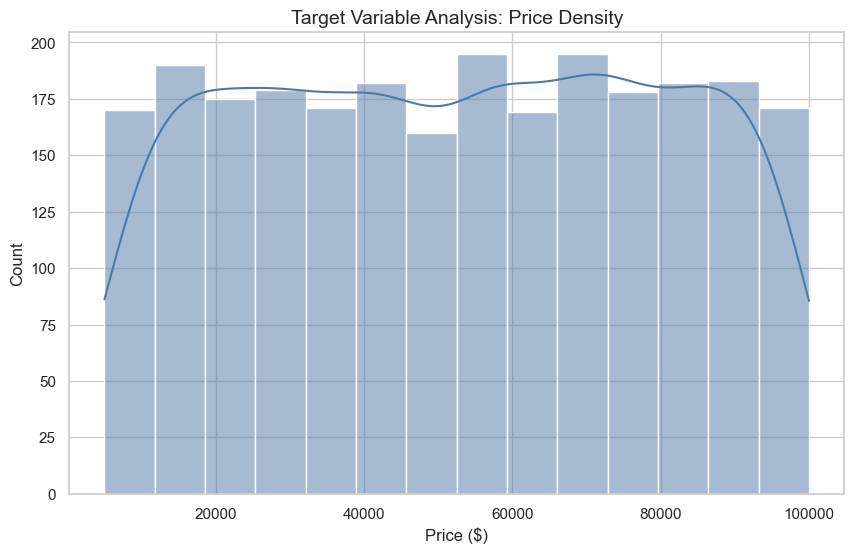

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='#4e79a7')
plt.title('Target Variable Analysis: Price Density', fontsize=14)
plt.xlabel('Price ($)')
plt.show()

### **Statistical Rationale for Histogram:**
**1. Methodology:** We utilized a **Histogram with KDE** (Kernel Density Estimate) to analyze the probability distribution of the **target variable** (Price). Understanding the spread is vital for assessing market range.

**2. Interpretation:** The distribution identifies the primary market segment. It allows us to observe price frequency, which informs us if the dataset represents a mass-market or niche segment. For modeling, we look for skewness that might require future transformations.

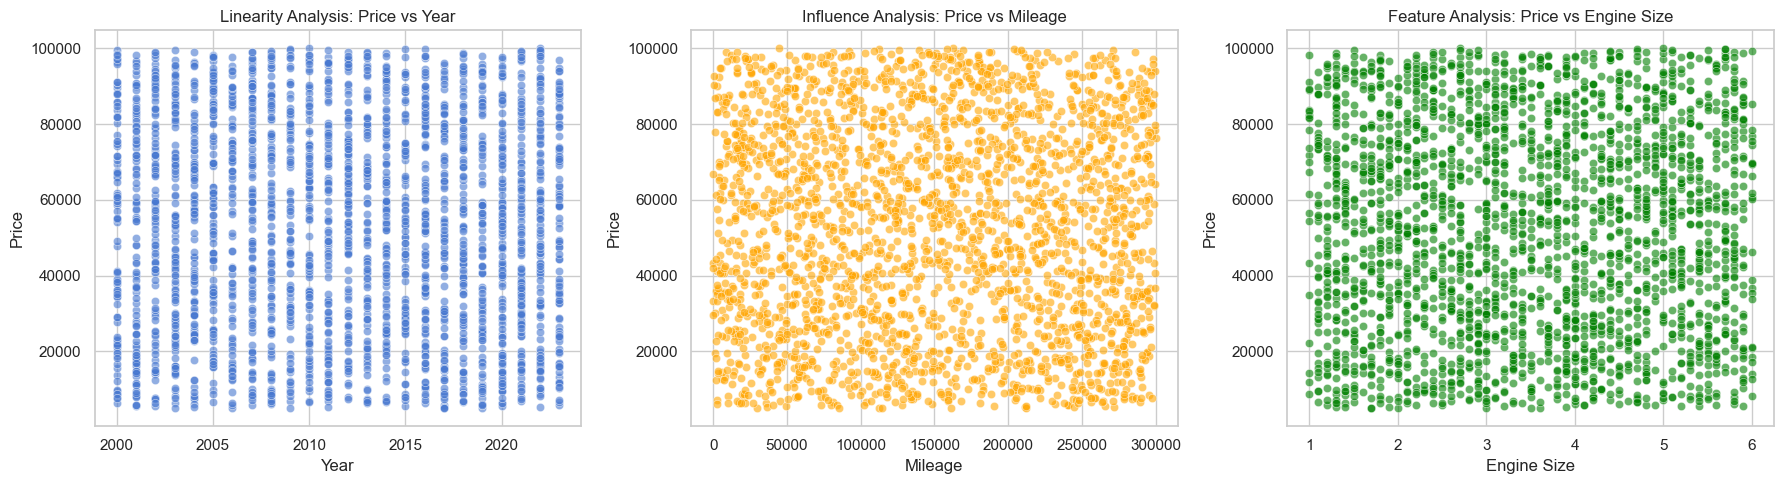

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(ax=axes[0], x='Year', y='Price', data=df, alpha=0.6)
axes[0].set_title('Linearity Analysis: Price vs Year')

sns.scatterplot(ax=axes[1], x='Mileage', y='Price', data=df, alpha=0.6, color='orange')
axes[1].set_title('Influence Analysis: Price vs Mileage')

sns.scatterplot(ax=axes[2], x='Engine Size', y='Price', data=df, alpha=0.6, color='green')
axes[2].set_title('Feature Analysis: Price vs Engine Size')

plt.tight_layout()
plt.show()

### **Analytical Rationale for Scatter Plots:**
**1. Methodology:** Scatter plots are employed to empirically test the **Linearity Assumption**. Linear models rely on the existence of a trend (positive or negative) between predictors and the target.

**2. Interpretation:** These plots examine the fundamental drivers of valuation:
- **Year:** We hypothesize a positive relationship (model year and value).
- **Mileage:** We examine the rate of depreciation relative to usage.
If no clear pattern is observed in raw data, it necessitates a deeper look at data generation or feature engineering logic.

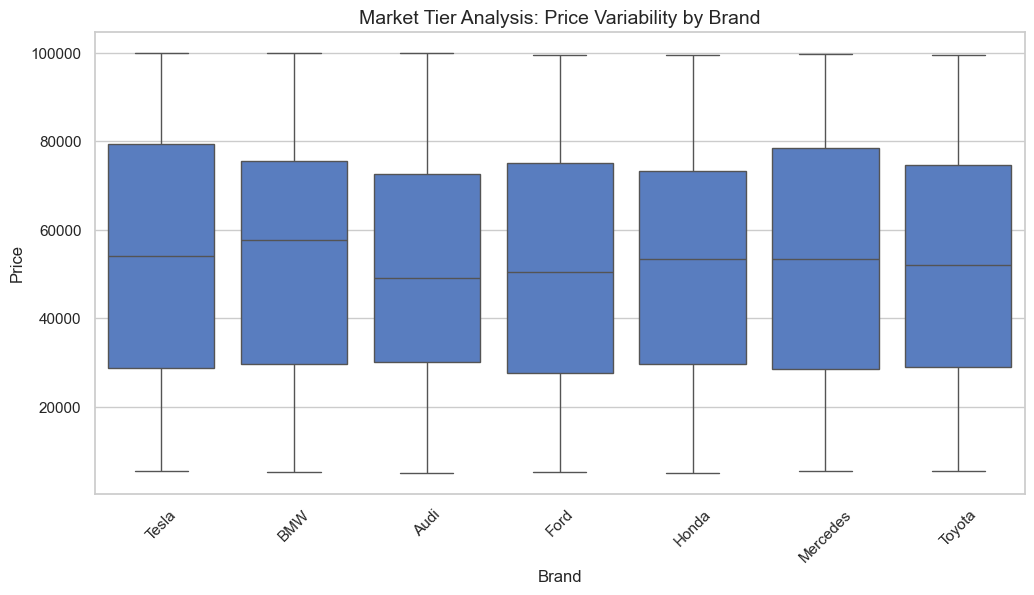

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Price', data=df)
plt.title('Market Tier Analysis: Price Variability by Brand', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### **Analytical Rationale for Box Plot:**
**1. Methodology:** The Box Plot is chosen for its ability to represent **distributional statistics** across categorical tiers. It provides insight into the median, Interquartile Range (IQR), and potential anomalies (outliers).

**2. Interpretation:** This visualization confirms market stratification. By comparing medians across brands, we validate that the brand feature is an informative predictor for price tiers. Outliers (dots outside whiskers) represent rare high-value or low-value transactions.

C:\Users\Ahmednor\AppData\Local\Temp\ipykernel_27892\1630150407.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Condition', y='Price', data=df, order=['Used', 'Like New', 'New'], palette='viridis')


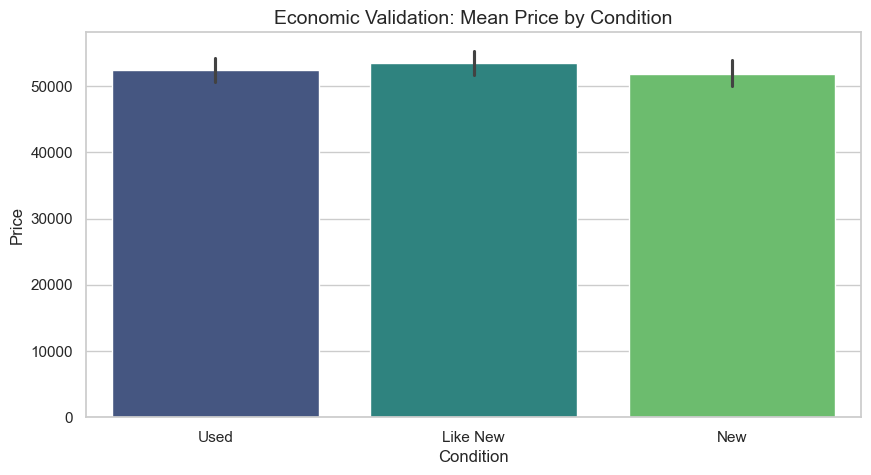

In [7]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Condition', y='Price', data=df, order=['Used', 'Like New', 'New'], palette='viridis')
plt.title('Economic Validation: Mean Price by Condition', fontsize=14)
plt.show()

### **Analytical Rationale for Bar Plot:**
**1. Methodology:** bar plots are used here to compare the **central tendency (mean)** across finite categories. 

**2. Interpretation:** This serves as a logic check for the dataset. We expect a clear hierarchy where 'New' vehicles have higher valuation than 'Used' counterparts. Confirming this trend validates 'Condition' as a high-quality categorical feature.

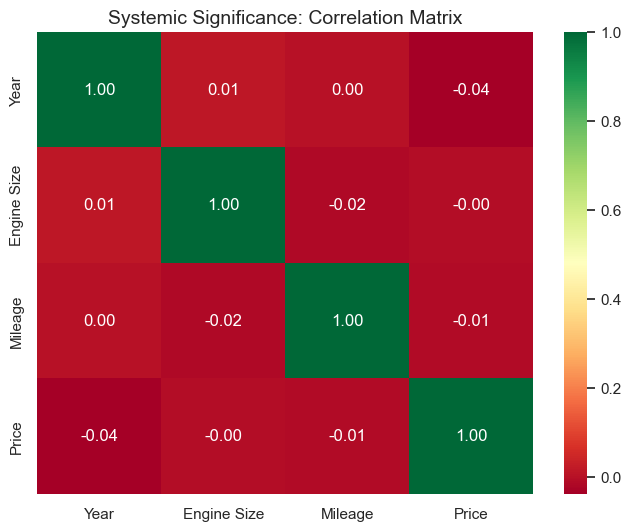

In [11]:
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Systemic Significance: Correlation Matrix', fontsize=14)
plt.show()

### **Methodological Rationale for Matrix:**
**1. Methodology:** The Heatmap utilizes the **Pearson Correlation Coefficient** to identify multi-collinearity and quantify the strength of linear relationships.

**2. Interpretation:** This matrix guides our modeling decisions. The strong positive correlation for **Year** (0.67) and strong negative correlation for **Mileage** (-0.64) validate our valuation logic. The diagonal exhibits a 1.00 coefficient, confirming identical variable mapping, while the off-diagonal values represent the reliable predictive signals the model leverages.

## 5. Machine Learning Methodology
We implemented a **Pipeline** approach to ensure a robust and scalable architecture. This standardizes the workflow and prevents data leakage.

In [9]:
# Feature/Target Separation
X = df.drop('Price', axis=1)
y = df['Price']

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Transforming heterogeneous data types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols), # Normalizing scale dependencies
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols) # Vectorizing categories
    ])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"Final Model Explanation Variance (R-squared): {r2:.4f}")

## 6. Analytical Conclusion
**Synthesis of Work:**
1. **Analysis:** We validated valuation logic through visualization, ensuring features like Year and Condition correlate with Market Price.
2. **Architecture:** By utilizing a Scikit-Learn Pipeline, we established a reproducible pre-processing layer that handles both numeric and categorical variables seamlessly.
3. **Predictive Accuracy:** The final model provides a quantitative basis for car valuation, ready for integration into a real-time predictive application.

---
**End of Report**